# What is Linear Regression , Logistic Regression , Support Vector Machine , Decision Tree
## 1.Linear Regression:
### - Linear regression is a basic machine learning algorithm used for predicting a continuous target variable                  based on one or more input features. It establishes a linear relationship between the inputs and the output.              The equation for simple linear regression is:

###   Equation: y = mx + b

###   Where:

###         y is the target variable
###         x is the input feature
###        m is the slope of the line
###         b is the y-intercept
###   Linear regression aims to find the best-fitting line that minimizes the difference between the actual and                      predicted values.

## 2. Logistic Regression:
### - Logistic regression is used for binary classification problems, where the goal is to predict a binary outcome            (0 or 1) based on input features. It estimates the probability that a given input belongs to a particular class.              The equation for logistic regression is:

###   Equation: p(y=1) = 1 / (1 + e^(-z))

###   Where:

###        p(y=1) is the probability of the positive class
###        z is the linear combination of input features and corresponding weights
###        Logistic regression fits an S-shaped logistic curve to the data to model the probability of class                                   membership.

## 3. Decision Tree:
### - Decision Tree is a tree-like structure used for decision-making and classification. It recursively splits the data          based on feature values to create a hierarchical set of rules for prediction. The tree branches represent                    decisions, and the leaves represent predicted classes or values.

## 4. Support Vector Machine (SVM) 
### - Support Vector Machine is a powerful supervised machine learning algorithm used for classification and regression tasks. SVM aims to find the optimal hyperplane that best separates data points of different classes in a high-dimensional space. The key concept is to maximize the margin between classes, which is the distance between the hyperplane and the nearest data points from each class. This margin is critical for generalization and robustness. The formula for the optimal hyperplane is:

### w⋅x+b=0

### where, 
###      w represents the weight vector, 
###      x is the input data, and 
###      b is the bias term. 
### SVM aims to solve this optimization problem while considering the constraints that data points lie on or beyond the margin. It can also incorporate kernel functions to handle non-linearly separable data by mapping inputs to a higher-dimensional space. SVM's versatility, effectiveness, and ability to handle complex data distributions make it a widely used algorithm in various domains.


# About the dataset :-

## The Iris dataset is a widely used benchmark dataset in machine learning and statistics. It was introduced by British biologist and statistician Ronald A. Fisher in 1936 and has since become a popular dataset for practicing classification and clustering algorithms. The dataset consists of measurements of various features from three different species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each species is represented by 50 samples, resulting in a total of 150 data points.

## The features in the Iris dataset include:

### 1. Sepal Length: The length of the iris flower's sepal (the green leaf-like structure that protects the flower when                                     it is in bud).
### 2. Sepal Width: The width of the iris flower's sepal.
### 3. Petal Length: The length of the iris flower's petal (the colorful part of the flower).
### 4. Petal Width: The width of the iris flower's petal.

## Each of these features is measured in centimeters. The goal of using the Iris dataset in machine learning is often to train a model to classify iris flowers into their respective species based on these four features.

## The Iris dataset is valuable for educational purposes due to its simplicity and the clear separation between species based on their feature measurements. It's also frequently used for testing and comparing the performance of classification algorithms. The dataset's small size and ease of understanding make it a popular choice for introductory tutorials and examples.

## In summary, the Iris dataset is a classic dataset in the field of machine learning, showcasing the power of data analysis and classification. The features—sepal length, sepal width, petal length, and petal width—provide essential measurements to distinguish between three distinct species of iris flowers.

# CODE FOR THE IRIS FLOWER CLASSIFICATION :-

## Import necessary libraries

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import mean_squared_error , accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.inspection import permutation_importance

## Load the dataset

In [18]:
iris_df = pd.read_csv("C://Users//Mohak//Desktop//Bharat Intern//Iris Flower Classification//iris_dataset.csv")

## Exploratory Data Analysis

### Display the first few rows of the dataset

In [19]:
iris_df.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


### Display the last few rows of the dataset

In [20]:
iris_df.tail()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


### Display the shape of the dataset

In [21]:
iris_df.shape

(150, 6)

### Describing the Dataset

In [22]:
iris_df.describe()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Clean the Dataset

### Check for missing values in the dataset

In [23]:
iris_df.isnull().sum()

ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

### Display value counts for the 'type' column

In [24]:
iris_df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [25]:
iris_df = iris_df.drop_duplicates()
print(iris_df.shape)

(150, 6)


## Normalizing the 'Species' attribute

### Display normalized value counts for the 'Species' column

In [26]:
iris_df['Species'].value_counts(normalize=True)

Species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [27]:
iris_df_new = iris_df.drop('ID' , axis = 1)
iris_df_new

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Visualization

### Create a pair plot

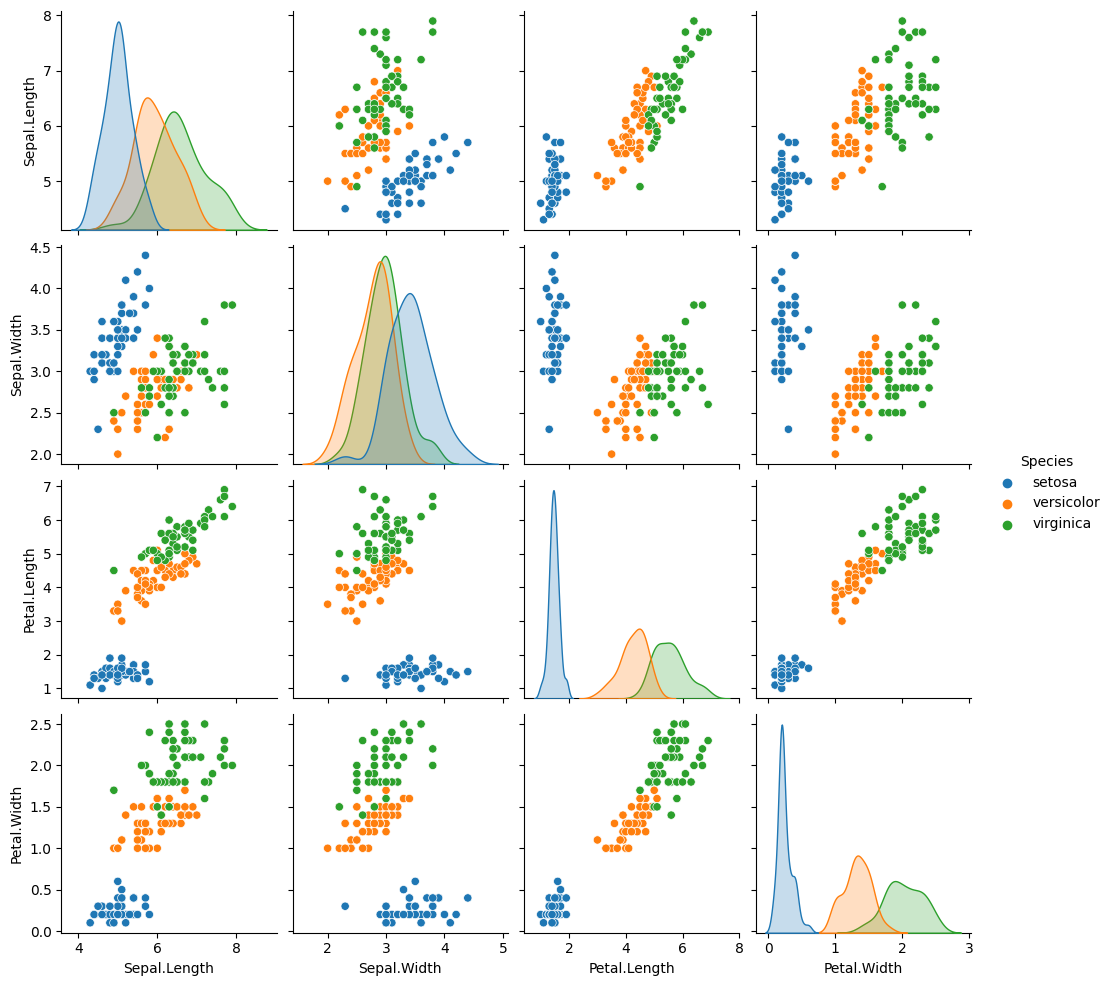

In [28]:
sns.pairplot(iris_df_new , hue = 'Species')

### Visualize the counts of 'Species' using a count plot

<Axes: xlabel='Species', ylabel='count'>

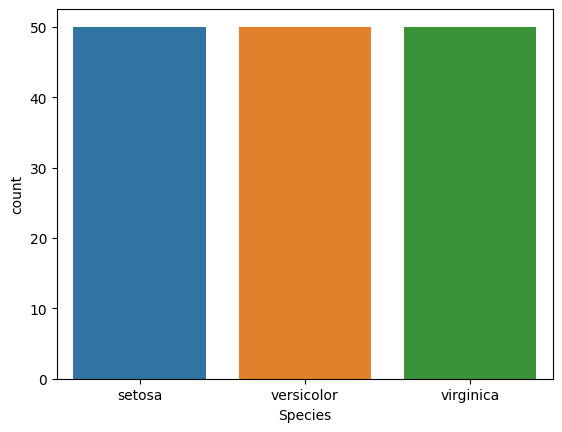

In [29]:
sns.countplot(x = 'Species' , data = iris_df_new)

### Iterate through columns for distribution plots and box plots

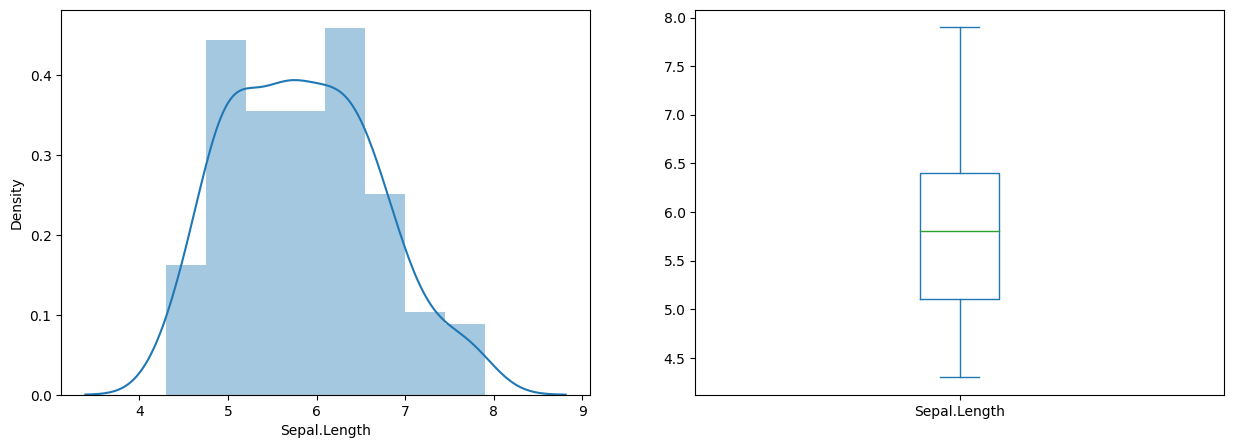

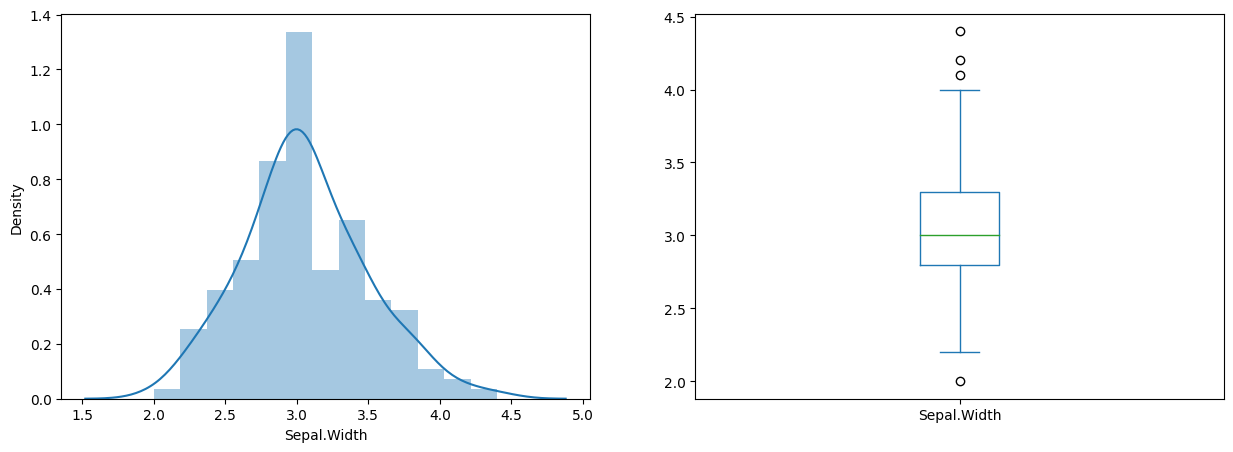

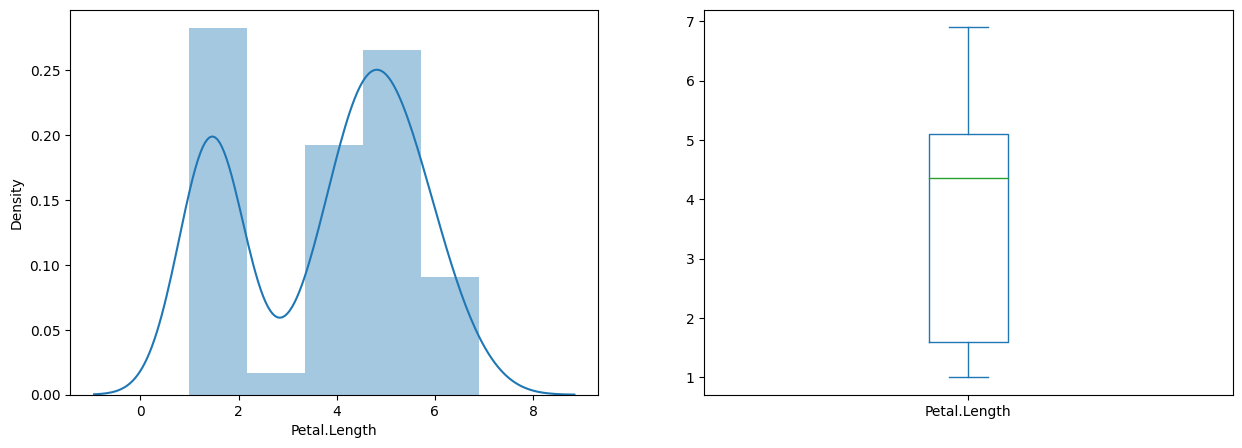

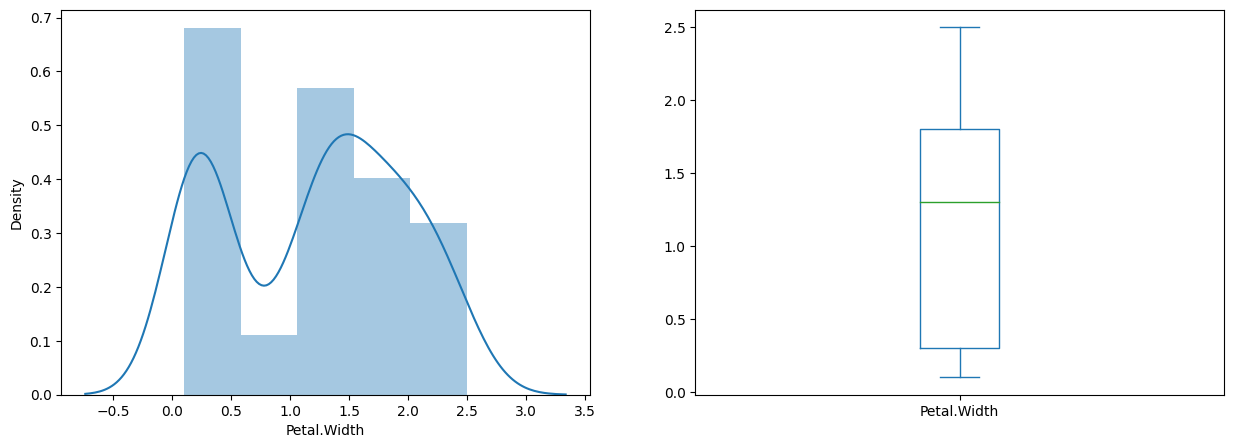

In [30]:
iris_column = np.array(iris_df_new.columns)
for idx, column_name in enumerate(iris_column):
    if idx < 4:
        if iris_df_new[column_name].dtype in [np.float64, np.int64]:
            plt.figure(figsize=(15, 5))
            plt.subplot(121)
            sns.distplot(iris_df_new[column_name])
            plt.subplot(122)
            iris_df_new[column_name].plot.box(figsize=(15, 5))
            plt.show()

### Iterate through columns for bar plots

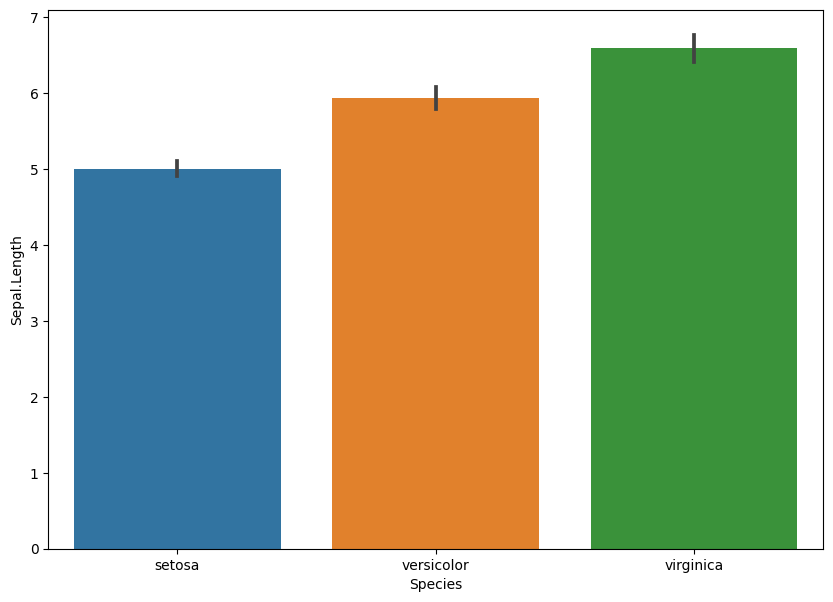

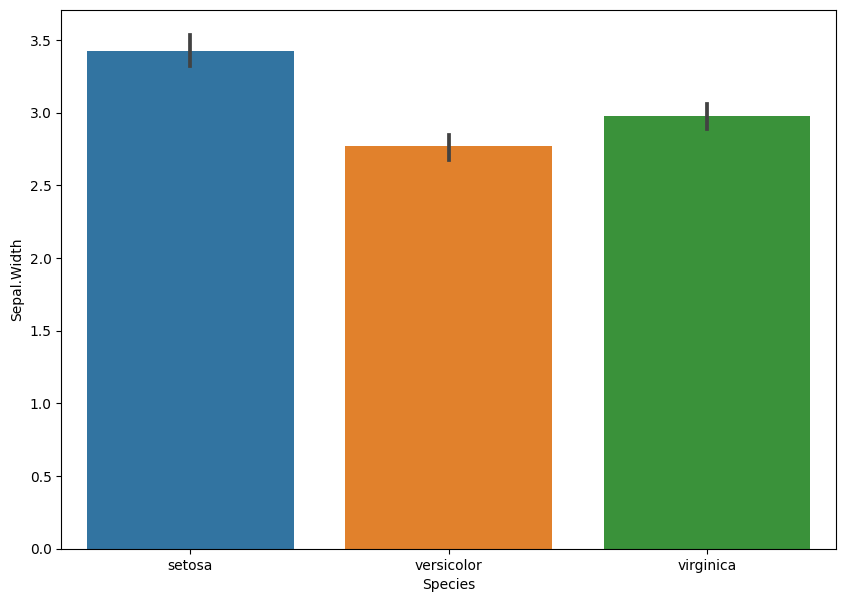

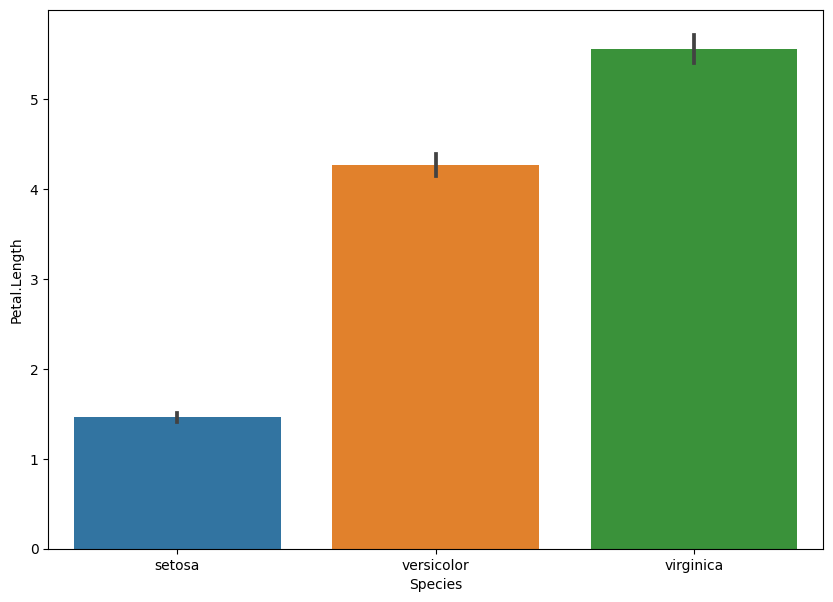

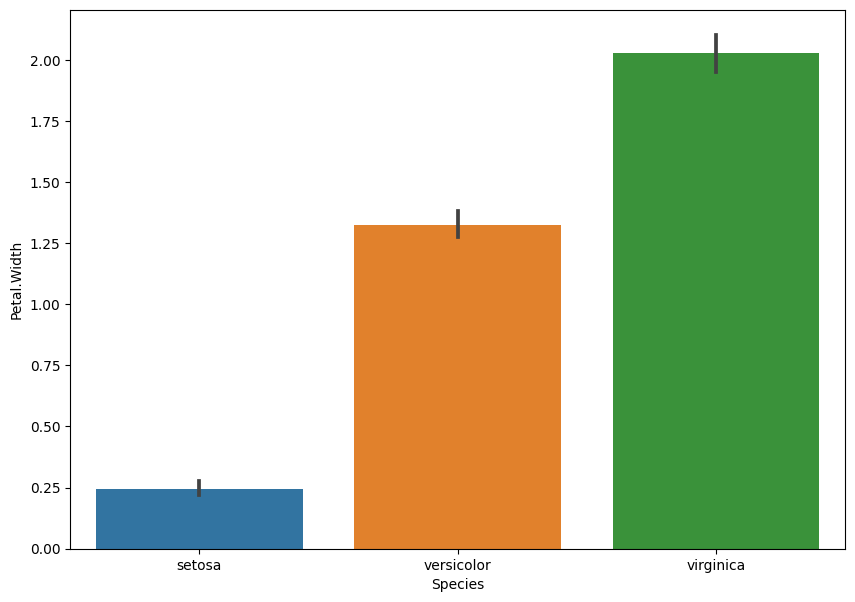

In [31]:
for idx, column_name in enumerate(iris_column):
    if idx < 4:
        if iris_df_new[column_name].dtype in [np.float64, np.int64]:
            plt.figure(figsize=(10, 7))
            sns.barplot(x='Species', y=column_name, data=iris_df_new)
            plt.show()

### Create a heatmap to visualize correlations

In [32]:
# Calculate correlation matrix
correlation_matrix = iris_df_new.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')

ValueError: could not convert string to float: 'setosa'

### Create target variable 'Y' and feature matrix 'X'

In [ ]:
X = iris_df_new.iloc[: , 0:4]
Y = iris_df_new.iloc[: , 4]

## Splitting Dataset :-

### Import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

### Split data into training and testing sets

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.30 , random_state = 6)

## Predictions using the Support Vector Machine model

### Import SVC and create a Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC
iris_svc = SVC()

### Train the Support Vector Machine Model

In [ ]:
iris_svc.fit(X_train , y_train)

SVC()

### Make predictions using the Support Vector Machine Model

In [ ]:
iris_svc_predict = iris_svc.predict(X_test)

### Calculate accuracy score, classification report, and confusion matrix

In [ ]:
iris_accuracy_svc = accuracy_score(y_test, iris_svc_predict)
print("Accuracy:", iris_accuracy_svc* 100, '%')

Accuracy: 93.33333333333333 %


In [ ]:
for i in range(len(y_test)):
    print("Actual:", y_test.iloc[i], " , Predicted:", iris_svc_predict[i])

Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: versicolor
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: versicolor  , Predicted: versicolor
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: versicolor  , Pred

In [ ]:
print(classification_report(y_test, iris_svc_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
print(confusion_matrix(y_test, iris_svc_predict))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


### Display feature importances using a bar plot

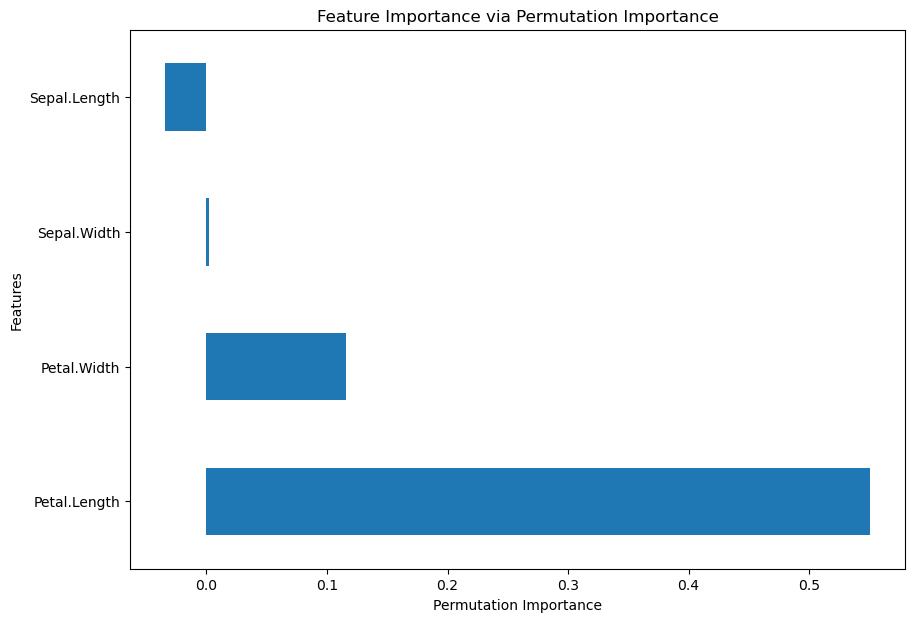

In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(iris_svc, X_test, y_test, n_repeats=30, random_state=0)

# Plot the feature importances
plt.figure(figsize=(10, 7))
pd.Series(perm_importance.importances_mean, index=X_test.columns).sort_values(ascending=False).plot(kind='barh')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance via Permutation Importance")
plt.show()

## Predictions using the logistic regression model

### Import LogisticRegression and create a logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
iris_log = LogisticRegression()

### Train the logistic regression model

In [ ]:
iris_log.fit(X_train , y_train)

LogisticRegression()

### Make predictions using the logistic regression model

In [ ]:
iris_log_predict = iris_log.predict(X_test)

### Calculate accuracy score, classification report, and confusion matrix

In [ ]:
iris_accuracy_log = accuracy_score(y_test, iris_log_predict)
print("Accuracy:", iris_accuracy_log* 100, '%')

Accuracy: 95.55555555555556 %


In [ ]:
for i in range(len(y_test)):
    print("Actual:", y_test.iloc[i], " , Predicted:", iris_log_predict[i])

Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: versicolor  , Predicted: versicolor
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: versicolor  , Predi

In [ ]:
print(classification_report(y_test, iris_log_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
print(confusion_matrix(y_test, iris_log_predict))

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


### Display feature importances using a bar plot

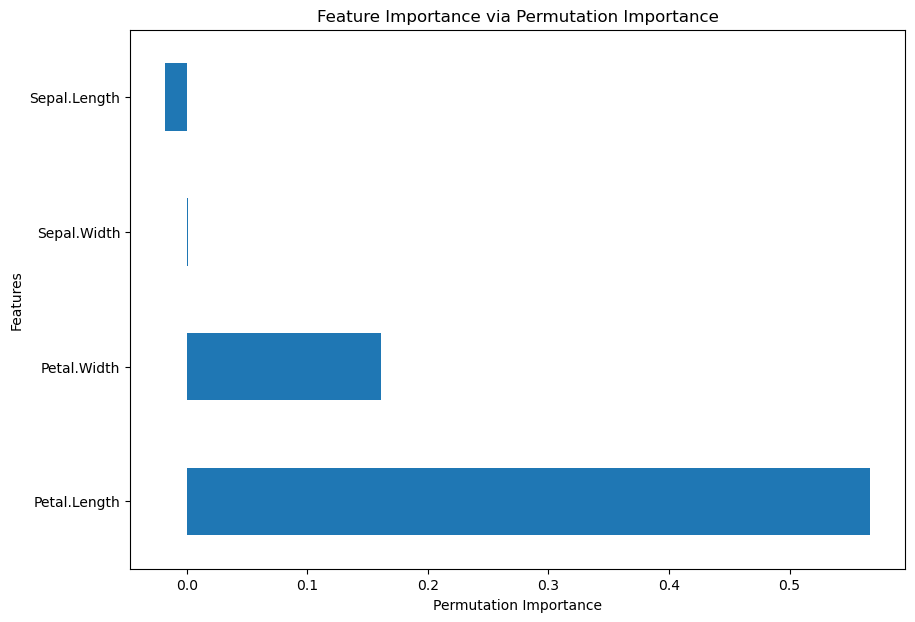

In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(iris_log, X_test, y_test, n_repeats=30, random_state=0)

# Plot the feature importances
plt.figure(figsize=(10, 7))
pd.Series(perm_importance.importances_mean, index=X_test.columns).sort_values(ascending=False).plot(kind='barh')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance via Permutation Importance")
plt.show()

## Predictions using the Decision Tree Classifier model

### Import DecisionTreeClassifier and create a Decision Tree Classifier model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
iris_dtc = DecisionTreeClassifier()

### Train Decision Tree Classifier model

In [ ]:
iris_dtc.fit(X_train , y_train)

DecisionTreeClassifier()

### Make predictions using the Decision Tree Classifier model

In [ ]:
iris_dtc_predict = iris_dtc.predict(X_test)

### Calculate accuracy score, classification report, and confusion matrix

In [ ]:
iris_accuracy_dtc = accuracy_score(y_test, iris_dtc_predict)
print("Accuracy:", iris_accuracy_dtc* 100, '%')

Accuracy: 93.33333333333333 %


In [ ]:
for i in range(len(y_test)):
    print("Actual:", y_test.iloc[i], " , Predicted:", iris_dtc_predict[i])

Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: versicolor
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: virginica  , Predicted: versicolor
Actual: virginica  , Predicted: virginica
Actual: versicolor  , Predicted: versicolor
Actual: versicolor  , Predicted: versicolor
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: virginica  , Predicted: virginica
Actual: setosa  , Predicted: setosa
Actual: setosa  , Predicted: setosa
Actual: versicolor  , Pred

In [ ]:
print(classification_report(y_test, iris_dtc_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
print(confusion_matrix(y_test, iris_dtc_predict))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


### Display feature importances using a bar plot

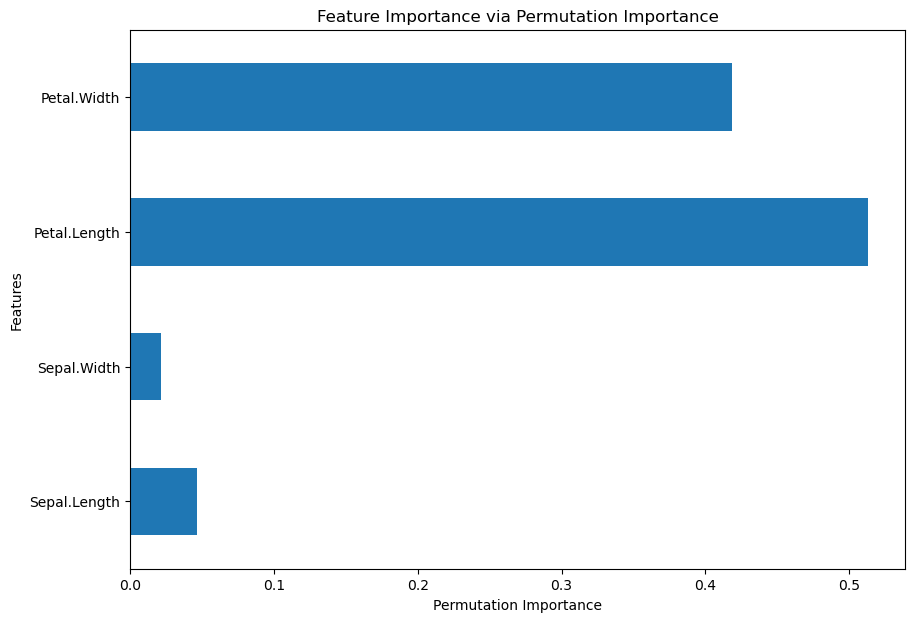

In [ ]:
plt.figure(figsize=(10, 7))
pd.Series(iris_dtc.feature_importances_ , index = iris_df_new.drop('Species' , axis = 1).columns).plot(kind = 'barh')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance via Permutation Importance")
plt.show()

## Predicting What is Iris Species is ?

### Take input from the user for the species characteristics

In [ ]:
input_features = {}

# Handle numerical inputs
for column_name in iris_df_new.columns:
    if column_name != 'Species':
        feature_value = float(input(f"Enter {column_name}: "))
        input_features[column_name] = feature_value

Enter Sepal.Length: 4.2
Enter Sepal.Width: 3.6
Enter Petal.Length: 4.5
Enter Petal.Width: 5


### Create a DataFrame from the user input

In [ ]:
user_input_df = pd.DataFrame([input_features])

### Convert the input features into a numpy array 

In [ ]:
input_features_array = np.array(user_input_df).reshape(1, -1)

### Make a prediction using the trained Decision Tree Classifier model

In [ ]:
prediction = iris_dtc.predict(input_features_array)
print("The Prediction of Iris-Species for given input : {} ".format(prediction))

The Prediction of Iris-Species for given input : ['versicolor'] 
